In [ ]:
# 초기 지식맵: 교육과정 표 & 문제 간 사전 정의된관계를 기반으로 시각화(파이썬 라이브러리)

In [1]:
# NetworkX: 지식맵 구성

import networkx as nx
import matplotlib.pyplot as plt

# 데이터 정의 (노드와 엣지)
edges = [
    # 변화와 관계
    ("변화와 관계", "규칙 찾기"),
    ("변화와 관계", "규칙 정하기"),
    ("변화와 관계", "등호와 동치 관계"),
    ("규칙 찾기", "배열에서 규칙 찾기"),
    ("규칙 정하기", "규칙에 따라 배열하기"),
    ("등호와 동치 관계", "등호 사용하기"),
    ("배열에서 규칙 찾기", "물체 배열 규칙을 여러 가지 방법으로 표현하기"),
    ("배열에서 규칙 찾기", "무늬 배열 규칙을 여러 가지 방법으로 표현하기"),
    ("배열에서 규칙 찾기", "수 배열 규칙을 여러 가지 방법으로 표현하기"),
    ("배열에서 규칙 찾기", "다양한 변화 규칙을 수로 나타내기"),
    ("배열에서 규칙 찾기", "다양한 변화 규칙을 식으로 나타내기"),
    ("배열에서 규칙 찾기", "계산식 배열 규칙으로 계산 결과 추측하기"),
    ("규칙에 따라 배열하기", "물체 배열하기"),
    ("규칙에 따라 배열하기", "무늬 배열하기"),
    ("규칙에 따라 배열하기", "수 배열하기"),
    ("등호 사용하기", "크기가 같은 두 양의 관계를 식으로 나타내기"),
    # 자료와 가능성
    ("자료와 가능성", "분류하기"),
    ("자료와 가능성", "자료 수집하기"),
    ("분류하기", "개수 세기"),
    ("분류하기", "표로 나타내기"),
    ("분류하기", "○, ×, / 를 이용한 그래프로 나타내기"),
    ("자료 수집하기", "자료 정리하기"),
    ("개수 세기", "기준에 따른 결과 말하기"),
    ("표로 나타내기", "표로 나타내면 편리한 점 말하기"),
    ("○, ×, / 를 이용한 그래프로 나타내기", "그래프로 나타내면 편리한 점 말하기"),
    ("자료 정리하기", "그림그래프로 나타내고 해석하기"),
    ("자료 정리하기", "막대그래프로 나타내고 해석하기"),
    ("자료 정리하기", "꺾은선그래프로 나타내고 해석하기"),
]

# 그래프 생성
G = nx.DiGraph()  # 방향성 그래프
G.add_edges_from(edges)

# 노드 및 엣지 추가 완료
print(f"노드 수: {G.number_of_nodes()}")
print(f"엣지 수: {G.number_of_edges()}")

노드 수: 30
엣지 수: 28


C:\Users\boar2\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\boar2\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\boar2\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\boar2\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\boar2\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44228 

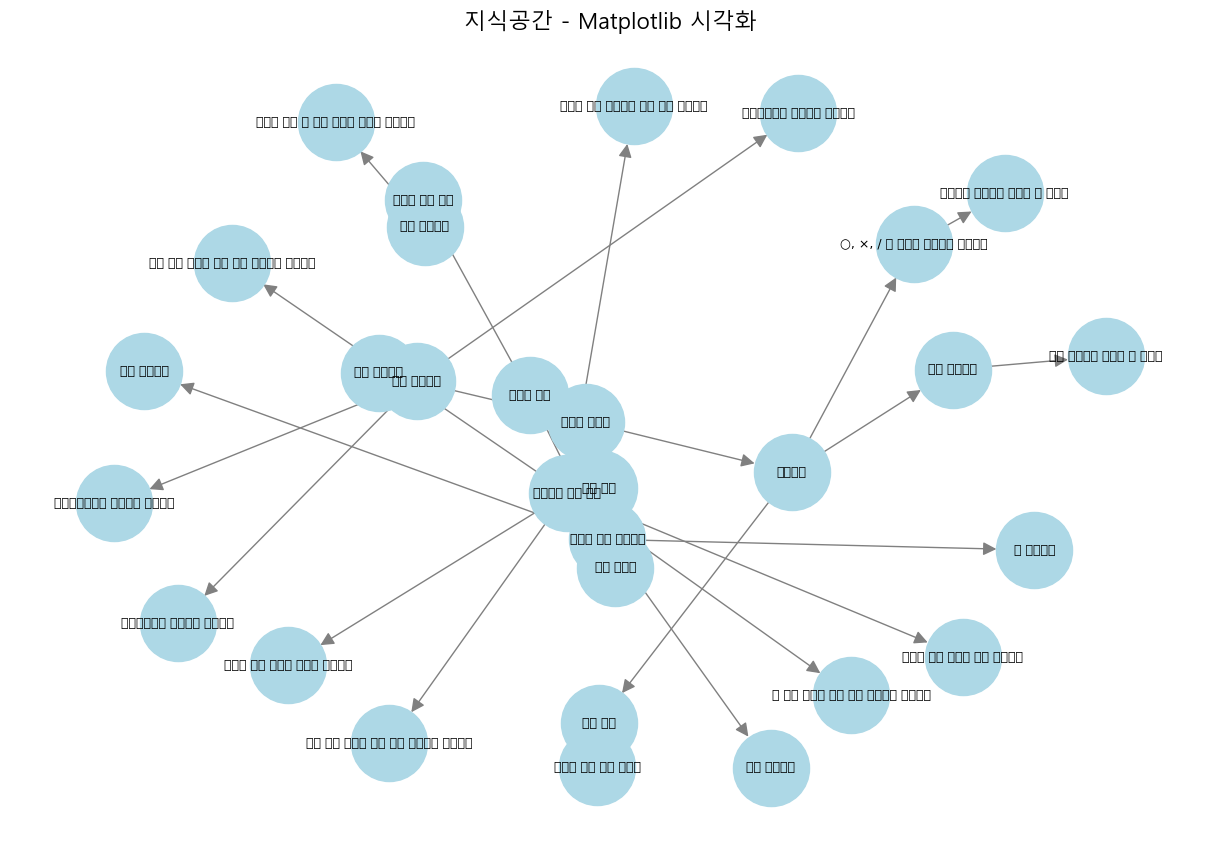

In [2]:
# 시각화1: Matplotlib

import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # macOS
# plt.rcParams['font.family'] = 'NanumGothic'  # Linux

# Matplotlib 시각화
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # 노드 위치 계산
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=3000,
    font_size=9,
    font_color="black",
    node_color="lightblue",
    edge_color="gray",
    arrowsize=20,
)
plt.title("지식공간 - Matplotlib 시각화", fontsize=16)
plt.show()

In [3]:
from graphviz import Digraph

# Graphviz 객체 생성
dot = Digraph(format="png")
dot.attr(rankdir="LR", fontname="Malgun Gothic")  # Windows
# dot.attr(rankdir="LR", fontname="AppleGothic")  # macOS
# dot.attr(rankdir="LR", fontname="NanumGothic")  # Linux

# 노드와 엣지 추가
for node in G.nodes:
    dot.node(node, label=node)
for edge in G.edges:
    dot.edge(edge[0], edge[1])

# 출력 및 보기
dot.render("knowledge_space_graphviz")
dot.view()

'knowledge_space_graphviz.png'

In [4]:
import plotly.graph_objects as go

# 노드와 엣지 데이터 생성
pos = nx.spring_layout(G, seed=42)
edge_x = []
edge_y = []
for edge in G.edges:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# 엣지 추적
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color="#888"),
    hoverinfo="none",
    mode="lines",
)

# 노드 추적
node_x = []
node_y = []
node_text = []
for node in G.nodes:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode="markers+text",
    text=node_text,
    textposition="top center",
    marker=dict(size=10, color="lightblue", line_width=2),
)

# Plotly Figure 생성
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title="Plotly 시각화",
        titlefont_size=16,
        showlegend=False,
        hovermode="closest",
        margin=dict(b=0, l=0, r=0, t=40),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False),
    ),
)
fig.show()

In [5]:
import plotly.graph_objects as go
import networkx as nx

# 숫자 태깅 번호와 라벨 매핑 (교육과정 표 데이터)
nodes_data = {
    "02": "변화와 관계",
    "02-01": "규칙 찾기",
    "02-02": "규칙 정하기",
    "02-03": "등호와 동치 관계",
    "02-01-01": "배열에서 규칙 찾기",
    "02-02-01": "규칙에 따라 배열하기",
    "02-03-01": "등호 사용하기",
    "02-01-01-01": "물체 배열 규칙을 여러 가지 방법으로 표현하기",
    "02-01-01-02": "무늬 배열 규칙을 여러 가지 방법으로 표현하기",
    "02-01-01-03": "수 배열 규칙을 여러 가지 방법으로 표현하기",
    "02-01-01-04": "다양한 변화 규칙을 수로 나타내기",
    "02-01-01-05": "다양한 변화 규칙을 식으로 나타내기",
    "02-01-01-06": "계산식 배열 규칙으로 계산 결과 추측하기",
    "02-02-01-01": "물체 배열하기",
    "02-02-01-02": "무늬 배열하기",
    "02-02-01-03": "수 배열하기",
    "02-03-01-01": "크기가 같은 두 양의 관계를 식으로 나타내기",
    "04": "자료와 가능성",
    "04-01": "분류하기",
    "04-02": "자료 수집하기",
    "04-01-01": "개수 세기",
    "04-01-02": "표로 나타내기",
    "04-01-03": "○, ×, / 를 이용한 그래프로 나타내기",
    "04-02-01": "자료 정리하기",
    "04-01-01-01": "기준에 따른 결과 말하기",
    "04-01-02-01": "표로 나타내면 편리한 점 말하기",
    "04-01-03-01": "그래프로 나타내면 편리한 점 말하기",
    "04-02-01-01": "그림그래프로 나타내고 해석하기",
    "04-02-01-02": "막대그래프로 나타내고 해석하기",
    "04-02-01-03": "꺾은선그래프로 나타내고 해석하기",
}

edges = [
    ("02", "02-01"),
    ("02", "02-02"),
    ("02", "02-03"),
    ("02-01", "02-01-01"),
    ("02-02", "02-02-01"),
    ("02-03", "02-03-01"),
    ("02-01-01", "02-01-01-01"),
    ("02-01-01", "02-01-01-02"),
    ("02-01-01", "02-01-01-03"),
    ("02-01-01", "02-01-01-04"),
    ("02-01-01", "02-01-01-05"),
    ("02-01-01", "02-01-01-06"),
    ("02-02-01", "02-02-01-01"),
    ("02-02-01", "02-02-01-02"),
    ("02-02-01", "02-02-01-03"),
    ("02-03-01", "02-03-01-01"),
    ("04", "04-01"),
    ("04", "04-02"),
    ("04-01", "04-01-01"),
    ("04-01", "04-01-02"),
    ("04-01", "04-01-03"),
    ("04-02", "04-02-01"),
    ("04-01-01", "04-01-01-01"),
    ("04-01-02", "04-01-02-01"),
    ("04-01-03", "04-01-03-01"),
    ("04-01-03", "04-02-01-01"),
    ("04-01-03", "04-02-01-02"),
    ("04-01-03", "04-02-01-03"),
    ("04-02-01", "04-02-01-01"),
    ("04-02-01", "04-02-01-02"),
    ("04-02-01", "04-02-01-03"),
]

# 그래프 생성
G = nx.DiGraph()
G.add_edges_from(edges)

# 노드와 엣지 데이터 생성
pos = nx.spring_layout(G, seed=42)
edge_x = []
edge_y = []
for edge in G.edges:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# 엣지 추적
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color="#888"),
    hoverinfo="none",
    mode="lines",
)

# 노드 추적
node_x = []
node_y = []
node_hovertext = []
for node in G.nodes:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    # 마우스 호버 시 태깅 번호와 라벨 표시
    node_hovertext.append(f"태깅 번호: {node}<br>라벨: {nodes_data[node]}")

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode="markers",
    hovertext=node_hovertext,  # 노드 호버 정보 추가
    marker=dict(size=10, color="lightblue", line_width=2),
)

# Plotly Figure 생성
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title="교육과정 표 기반 지식맵 - Plotly 시각화",
        titlefont_size=16,
        showlegend=False,
        hovermode="closest",
        margin=dict(b=0, l=0, r=0, t=40),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False),
    ),
)
fig.show()

In [6]:
import plotly.graph_objects as go
import networkx as nx

# 숫자 태깅 번호와 라벨 매핑 (교육과정 표 데이터)
nodes_data = {
    "02": "변화와 관계",
    "02-01": "규칙 찾기",
    "02-02": "규칙 정하기",
    "02-03": "등호와 동치 관계",
    "02-01-01": "배열에서 규칙 찾기",
    "02-02-01": "규칙에 따라 배열하기",
    "02-03-01": "등호 사용하기",
    "02-01-01-01": "물체 배열 규칙을 여러 가지 방법으로 표현하기",
    "02-01-01-02": "무늬 배열 규칙을 여러 가지 방법으로 표현하기",
    "02-01-01-03": "수 배열 규칙을 여러 가지 방법으로 표현하기",
    "02-01-01-04": "다양한 변화 규칙을 수로 나타내기",
    "02-01-01-05": "다양한 변화 규칙을 식으로 나타내기",
    "02-01-01-06": "계산식 배열 규칙으로 계산 결과 추측하기",
    "02-02-01-01": "물체 배열하기",
    "02-02-01-02": "무늬 배열하기",
    "02-02-01-03": "수 배열하기",
    "02-03-01-01": "크기가 같은 두 양의 관계를 식으로 나타내기",
    "04": "자료와 가능성",
    "04-01": "분류하기",
    "04-02": "자료 수집하기",
    "04-01-01": "개수 세기",
    "04-01-02": "표로 나타내기",
    "04-01-03": "○, ×, / 를 이용한 그래프로 나타내기",
    "04-02-01": "자료 정리하기",
    "04-01-01-01": "기준에 따른 결과 말하기",
    "04-01-02-01": "표로 나타내면 편리한 점 말하기",
    "04-01-03-01": "그래프로 나타내면 편리한 점 말하기",
    "04-02-01-01": "그림그래프로 나타내고 해석하기",
    "04-02-01-02": "막대그래프로 나타내고 해석하기",
    "04-02-01-03": "꺾은선그래프로 나타내고 해석하기",
}

edges = [
    ("02", "02-01"),
    ("02", "02-02"),
    ("02", "02-03"),
    ("02-01", "02-01-01"),
    ("02-02", "02-02-01"),
    ("02-03", "02-03-01"),
    ("02-01-01", "02-01-01-01"),
    ("02-01-01", "02-01-01-02"),
    ("02-01-01", "02-01-01-03"),
    ("02-01-01", "02-01-01-04"),
    ("02-01-01", "02-01-01-05"),
    ("02-01-01", "02-01-01-06"),
    ("02-02-01", "02-02-01-01"),
    ("02-02-01", "02-02-01-02"),
    ("02-02-01", "02-02-01-03"),
    ("02-03-01", "02-03-01-01"),
    ("04", "04-01"),
    ("04", "04-02"),
    ("04-01", "04-01-01"),
    ("04-01", "04-01-02"),
    ("04-01", "04-01-03"),
    ("04-02", "04-02-01"),
    ("04-01-01", "04-01-01-01"),
    ("04-01-02", "04-01-02-01"),
    ("04-01-03", "04-01-03-01"),
    ("04-01-03", "04-02-01-01"),
    ("04-01-03", "04-02-01-02"),
    ("04-01-03", "04-02-01-03"),
    ("04-02-01", "04-02-01-01"),
    ("04-02-01", "04-02-01-02"),
    ("04-02-01", "04-02-01-03"),
]

# 그래프 생성
G = nx.DiGraph()
G.add_edges_from(edges)

# 노드와 엣지 데이터 생성
pos = nx.spring_layout(G, seed=42)
edge_x = []
edge_y = []
for edge in G.edges:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# 엣지 추적
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color="#888"),
    hoverinfo="none",
    mode="lines",
)

# 노드 추적
node_x = []
node_y = []
node_text = []
node_hovertext = []
for node in G.nodes:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(nodes_data[node])  # 노드에 표시할 한글 라벨
    node_hovertext.append(f"태깅 번호: {node}")  # 마우스 호버 시 태깅 번호 표시

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode="markers+text",
    text=node_text,  # 노드에 한글 라벨 표시
    textposition="top center",
    hovertext=node_hovertext,  # 마우스 호버 시 태깅 번호 표시
    marker=dict(size=10, color="lightblue", line_width=2),
)

# Plotly Figure 생성
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title="교육과정 표 기반 지식맵 - Plotly 시각화",
        titlefont_size=16,
        showlegend=False,
        hovermode="closest",
        margin=dict(b=0, l=0, r=0, t=40),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False),
    ),
)
fig.show()

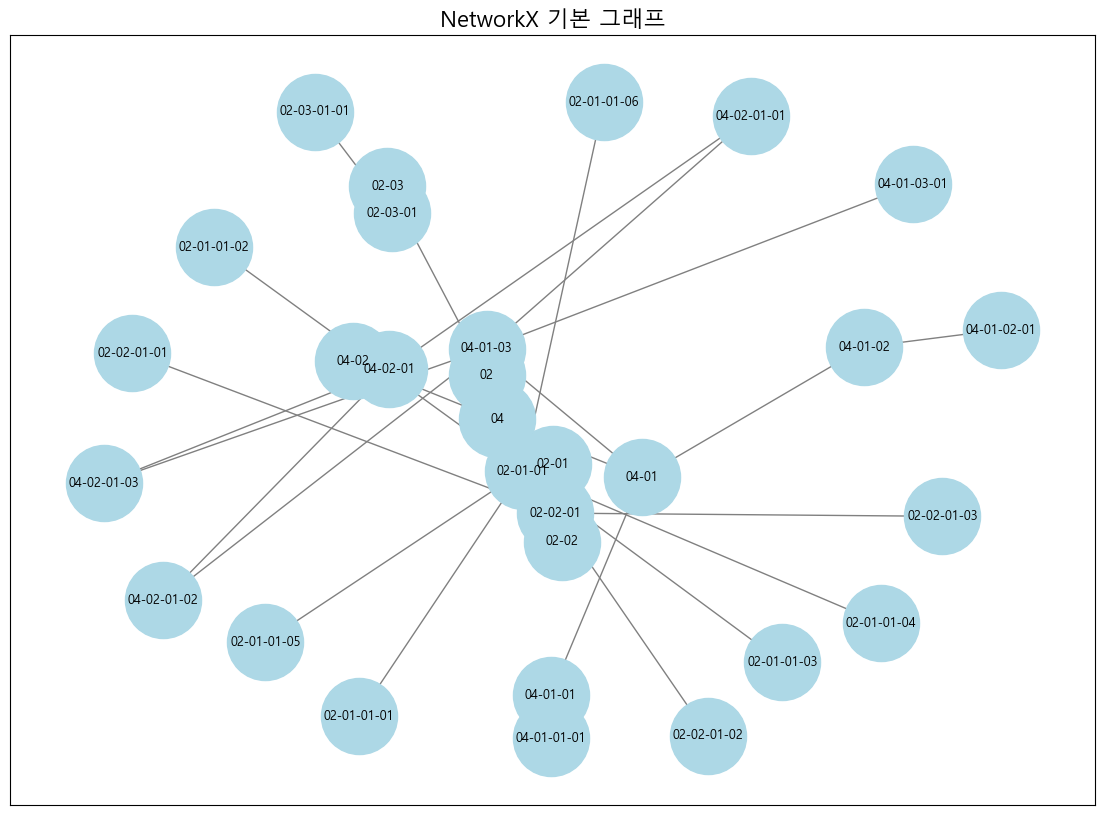

In [7]:
# NetworkX 기본 그래프 시각화
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=3000)
nx.draw_networkx_edges(G, pos, edge_color="gray", arrowsize=20)
nx.draw_networkx_labels(
    G,
    pos,
    labels={node: node for node in G.nodes},
    font_size=9,
    font_family="Malgun Gothic",
)  # Windows
plt.title("NetworkX 기본 그래프", fontsize=16)
plt.show()